# Linear Regression and modelling

### Approach
1. Import libraries
2. import Dataframes from CSV
3. Basic MLR on all features without transformation
4. Run Ridge and lasso on train dataframe and compare using R2 score and RSME score to see which model perform better
5. A.(Adopt Ridge) Due to better results
5. B.Based on the results evulate top 25 features
6. Run evaluation on top 25 features using Ridge
7. Run Evaluation on All features(133 features) using Ridge (** Highest Score obtained)
8. Use step 6. top 25 features-> apply polynomial features power 2
9. Run All 350 polynomial features on Ridge
10. Run top 25 features using Ridge
11. Find Best score via Kaggle upload

### Things to improve on, 
1. use grid search
2. use RFE sklearn 

## Import Libraries

In [1]:
#import all relevant libs
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os
from IPython.display import display
import fnmatch

#sklibrary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import csv

In [2]:
df_train = pd.read_csv('df_train.csv')
df_test  = pd.read_csv('df_test.csv')

In [3]:
df_train.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,age_renovated,TotRms AbvGrd,Mas Vnr Area,...,Garage Type_CarPort,Exterior 1st_AsphShn,Lot Config_FR2,Lot Config_FR3,Heating_Grav,MS Zoning_RM,Exterior 2nd_ImStucc,Neighborhood_Greens,Sale Type_ConLw,Neighborhood_Edwards
0,109,1479,725.0,475.0,2.0,3.0,43,14,6,289.0,...,0,0,0,0,0,0,0,0,0,0
1,544,2122,913.0,559.0,2.0,4.0,23,22,8,132.0,...,0,0,0,0,0,0,0,0,0,0
2,153,1057,1057.0,246.0,1.0,2.0,66,12,5,0.0,...,0,0,0,0,0,0,0,0,0,0
3,318,1444,384.0,400.0,2.0,3.0,13,12,7,0.0,...,0,0,0,0,0,0,0,0,0,0
4,255,1445,676.0,484.0,2.0,2.0,119,26,6,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,age_renovated,TotRms AbvGrd,Mas Vnr Area,...,Garage Type_CarPort,Exterior 1st_AsphShn,Lot Config_FR2,Lot Config_FR3,Heating_Grav,MS Zoning_RM,Exterior 2nd_ImStucc,Neighborhood_Greens,Sale Type_ConLw,Neighborhood_Edwards
0,2658,1928,1020.0,440.0,1.0,2.0,109,69,9,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2718,1967,1967.0,580.0,2.0,2.0,42,42,10,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,1496,654.0,426.0,2.0,4.0,13,13,7,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,968,968.0,480.0,2.0,1.0,96,13,5,0.0,...,0,0,0,0,0,1,0,0,0,0
4,625,1394,1394.0,514.0,2.0,3.0,56,56,6,247.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(879, 132)

### Features to model

In [9]:
features =df_train.columns.drop(['SalePrice', 'Id'])

In [6]:
len(df_train.columns.drop(['SalePrice', 'Id'])) 

131

Attempt using MLR without any transformation

In [11]:
lr = LinearRegression()

In [12]:
X = df_train[features]
y = df_train['SalePrice']

In [13]:
model = lr.fit(X,y)

In [14]:
predictions = model.predict(X)
score = model.score(X,y)
print(score)

0.9013841961823447


1. The overall prediction score of 0.9 shall be use as a baseline to test for the result of other models. 
2. This score though above 90% (suggesting towards a highly co-linear relation) has too many features. 

## Model Prep: Train/test split
### Decide on Ridge or lasso regression
##### On a smaller note this model has the best RMSE among all models.(Please refer to the bottom part on more inferential visualization)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1636, 131), (409, 131), (1636,), (409,))

In [16]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001))
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)

ridge = Ridge(alpha= ridge_search.alpha_)

In [22]:
# combine types of regression
def regression(reg_list,X_train_ss, X_test_ss, y_train, y_test,features):
    coeff=[]
    for reg in reg_list:
        print('shape of data for train and test: ',X_train_ss.shape, X_test_ss.shape, y_train.shape, y_test.shape)
        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        r2score = r2_score(y_test, pred)
        rmse= np.sqrt(mean_squared_error(y_test, pred))
        print(reg)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print('R2 score:', r2score)
        print('test RMSE:', rmse)
        print(' ')
#         pd.Series(reg.coef_,index =features ).plot.bar(figsize=(15,7))
#         plt.show()
#         print(' ')
        reg_coeff =dict(zip(features,(reg.coef_)))
        coeff.append(reg_coeff)
    return coeff   

In [23]:
reg_list = [ridge,lasso]
coeff = regression(reg_list,X_train, X_test, y_train, y_test,features)

shape of data for train and test (1636, 131) (409, 131) (1636,) (409,)
Ridge(alpha=136.67163564620074, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)
Ridge score: [0.81009461 0.83203448 0.83296059 0.92498134 0.88020718 0.8388286
 0.90978068 0.88193226 0.83702841 0.90093576]
Ridge mean score: 0.8648783917328835
R2 score: 0.8575752218153536
test RMSE: 27117.201008652246
 
shape of data for train and test (1636, 131) (409, 131) (1636,) (409,)
Lasso(alpha=0.999, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Lasso score: [0.80244195 0.80047328 0.8535056  0.93124089 0.88835947 0.84412282
 0.91392632 0.88294867 0.8629146  0.91276978]
Lasso mean score: 0.869270337421065
R2 score: 0.8664086876197101
test RMSE: 26262.81005436359
 


Overall R2 score for Ridge is lower while RSME score for Lasso is lower. 

However with both scores are extremely close to each other, we will use both model for the next part
1. Model top 25 features with high correlation to target variable sale price

In [24]:
ridge_coeff = coeff[0]
lasso_coeff = coeff[1]

In [25]:
ridge_coeff_df = pd.DataFrame(list(ridge_coeff.items()),columns=['Features','Coefficient'])


In [26]:
#obtaining the top 25 features
ridge_coeff_df['abs coeff']= abs(ridge_coeff_df['Coefficient'])

In [27]:
features_model_2 =ridge_coeff_df.sort_values('abs coeff', ascending = False).head(25)['Features'].tolist()

print(features_model_2)
X = df_train[features_model_2]
y = df_train['SalePrice']

['Overall Qual', 'Sale Type_New', 'Neighborhood_NridgHt', 'Mas Vnr Type_BrkFace', 'Bldg Type_TwnhsE', 'Neighborhood_StoneBr', 'Total Bath', 'Neighborhood_NWAmes', 'Fireplaces', 'Bldg Type_Duplex', 'Roof Style_Hip', 'Neighborhood_Gilbert', 'Land Contour_Lvl', 'Land Contour_HLS', 'Bldg Type_Twnhs', 'MS Zoning_RL', 'Mas Vnr Type_None', 'Mas Vnr Type_Stone', 'Lot Config_CulDSac', 'Exterior 1st_CemntBd', 'Exterior 2nd_CmentBd', 'Exterior 1st_BrkFace', 'Foundation_Slab', 'Exterior 1st_Plywood', 'MS Zoning_RM']


In [28]:
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001))
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)

ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge,lasso]


(1636, 25) (409, 25) (1636,) (409,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [29]:
coeff_model_2 = regression(reg_list,X_train, X_test, y_train, y_test,features_model_2)

shape of data for train and test (1636, 25) (409, 25) (1636,) (409,)
Ridge(alpha=3.0018358135755894, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)
Ridge score: [0.74909325 0.75646135 0.78305732 0.86109914 0.80645394 0.74452905
 0.85355162 0.80539689 0.78747171 0.84314609]
Ridge mean score: 0.7990260345481921
R2 score: 0.7941840490132231
test RMSE: 32598.048347434247
 
shape of data for train and test (1636, 25) (409, 25) (1636,) (409,)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Lasso score: [0.74839842 0.75564714 0.78187756 0.85936332 0.80663025 0.7460977
 0.85264195 0.80515758 0.79072988 0.84541653]
Lasso mean score: 0.7991960327650119
R2 score: 0.7953418827402451
test RMSE: 32506.22759402992
 


Using both models, overall RMSE for lasso test data is slightly lower. 

(1636, 25) (409, 25) (1636,) (409,)
Ridge score: [0.74814334 0.75578898 0.78188442 0.85965765 0.80704127 0.74542464
 0.85280618 0.80501996 0.7906435  0.84536857]
Ridge mean score: 0.79917785121134
{'Gr Liv Area': 37130.12337728335, 'Total Bsmt SF': 7073.453925874879, 'Garage Area': 13186.19925128755, 'Garage Cars': 12183.430669503581, 'Total Bath': 11054.53605764239, 'age_property': 7021.2782915568205, 'age_renovated': 21479.96023079488, 'TotRms AbvGrd': 2861.8656460201355, 'Mas Vnr Area': 10081.089160452571, 'Fireplaces': 3226.48474971368, 'Overall Qual': 5129.405028620471, 'Bsmt Qual': 4622.384814697305, 'Garage Finish': 1102.6064113263367, 'Fireplace Qu': 2288.9609714162757, 'Heating QC': 9472.865462797108, 'Exterior 1st_MetalSd': 2362.7737504363745, 'Exterior 1st_VinylSd': 9239.638023295121, 'Neighborhood_MeadowV': 9660.761694298079, 'Neighborhood_StoneBr': 3389.2915158761493, 'Neighborhood_SWISU': 2693.6390807088915, 'House Style_SLvl': 2693.6390807083803, 'Garage Type_Detchd': 44

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


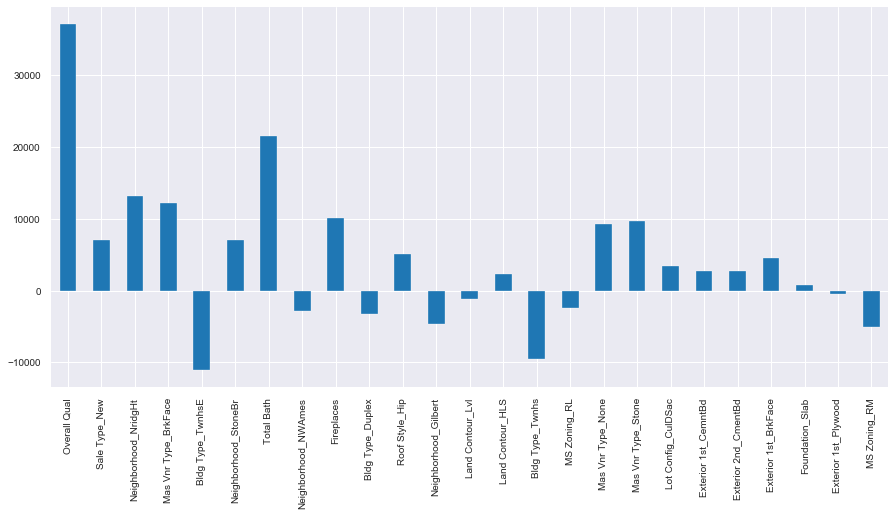

In [86]:
# use ridge model to do initial kaggle submission
#obtaining the top 25 features

X = df_train[features_model_2]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test[features_model_2])

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))

        reg_coeff =dict(zip(features,abs(reg.coef_)))

        print(reg_coeff)
        
        pd.Series(reg.coef_,index =features_model_2 ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        coeff.append(reg_coeff)

In [65]:
submission_df(pred)def submission_df(predict):
    df = pd.DataFrame(df_test['Id'])
    df['SalePrice'] = predict
    df.set_index(['Id'], inplace = True)
    df.to_csv('./data/answer.csv')

In [66]:
submission_df(pred)

Private Score 32448.99709
Public Score  33052.82339

(1636, 25) (409, 25) (1636,) (409,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Lasso score: [0.74839843 0.75564714 0.78187756 0.8593633  0.80663023 0.74609773
 0.85264192 0.80515757 0.79072991 0.84541657]
Lasso mean score: 0.7991960348936208
 


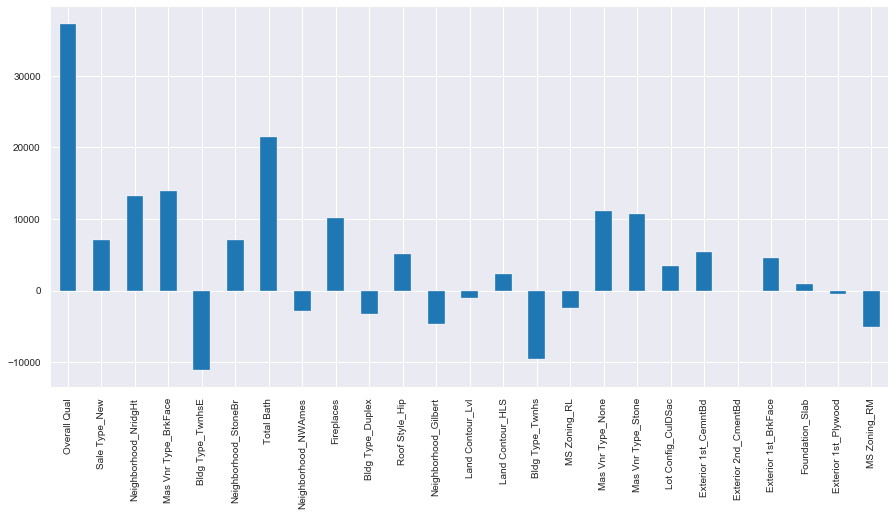

In [67]:
# use ridge model to do initial kaggle submission
#obtaining the top 25 features

X = df_train[features_model_2]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test[features_model_2])

lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001))
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

reg_list =[lasso]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
        
        pd.Series(reg.coef_,index =features_model_2 ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

In [68]:
submission_df(pred)

#### Kaggle Submission
Private Score 32348.99703
Public Score  33352.82335

### Attempt with all 133 features
This produce a better result some how ><"

In [71]:
# use ridge model to do initial kaggle submission
#obtaining the all features

X = df_train[features]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test[features])
X_test_train_ss = ss.transform(X_test)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
#         pd.Series(reg.coef_,index =features ).plot.bar(figsize=(15,7))
#         plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

(1636, 131) (409, 131) (1636,) (409,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataCo

Ridge score: [0.82278515 0.81289846 0.85736691 0.93488267 0.88426109 0.8382682
 0.91635547 0.8812537  0.85928063 0.91270461]
Ridge mean score: 0.8720056904366198
 
 


In [72]:
coeff[0]

{'Gr Liv Area': 17573.36652792517,
 'Total Bsmt SF': 11840.089405129402,
 'Garage Area': 6302.36785891713,
 'Garage Cars': 909.2103125177363,
 'Total Bath': 8552.975188927607,
 'age_property': 2930.5853008514246,
 'age_renovated': 5510.1066472329285,
 'TotRms AbvGrd': 1847.3385127409088,
 'Mas Vnr Area': 8586.234664865604,
 'Fireplaces': 4797.572171592171,
 'Overall Qual': 13945.759868591078,
 'Bsmt Qual': 3153.068551021053,
 'Garage Finish': 1363.5444894991983,
 'Fireplace Qu': 113.92603979672678,
 'Heating QC': 2158.012748679962,
 'Exterior 1st_MetalSd': 196.52585944115242,
 'Exterior 1st_VinylSd': 866.1211310051358,
 'Neighborhood_MeadowV': 574.7664114309803,
 'Neighborhood_StoneBr': 5434.305223292464,
 'Neighborhood_SWISU': 1153.344669740302,
 'House Style_SLvl': 7.450113972798276,
 'Garage Type_Detchd': 1389.7627380421122,
 'Exterior 2nd_HdBoard': 663.2755425932256,
 'Foundation_Slab': 3655.3209845930605,
 'Neighborhood_NoRidge': 3695.4379981491697,
 'Land Contour_HLS': 2124.78373

In [73]:
#this is for data visualation later on
ridge_coeff_df_final = pd.DataFrame(list(coeff[0].items()),columns=['Features','Coefficient'])
pred_final = ridge.predict(X_test_train_ss)
y_train_final = y_test

In [74]:
len(pred)

879

In [75]:
len(y_test)

409

In [76]:
submission_df(pred)

#### Kaggle Submission
Private Score 31534.80371
Public Score  32709.07920

### Applying polynominal features to top 25
Number of features = 350

As part of this project, the instructor suggest limiting the number of features to 25 . Hence Reduce the number of polynominal features to 25

In [78]:
poly = PolynomialFeatures(include_bias=False) #degree = 2

In [79]:
X = df_train[features_model_2]
y = df_train['SalePrice']

In [80]:
X_poly      = poly.fit_transform(X)
X_test_poly = poly.fit_transform(df_test[features_model_2])

df_train_poly = pd.DataFrame(X_poly,columns = poly.get_feature_names(features_model_2))
df_test_poly = pd.DataFrame(X_test_poly,columns = poly.get_feature_names(features_model_2))
X= df_train_poly

In [81]:
# use train-test split and ridge model to do initial kaggle submission

#Test run model with top 25 features
coeff=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test_poly)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

score = cross_val_score(ridge, X_train_ss, y_train, cv = 10)
ridge.fit(X_train_ss,y_train)

pred = ridge.predict(X_test_ss)
print('{} score: {}'.format(str(reg).split('(')[0],score))
print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
print(' ')
# pd.Series(ridge.coef_,index =df_train_poly.columns ).plot.bar(figsize=(15,7))
# plt.show()
print(' ')
reg_coeff =dict(zip(df_train_poly.columns.tolist(),abs(ridge.coef_)))
coeff.append(reg_coeff)

(1636, 350) (409, 350) (1636,) (409,)
Ridge score: [0.77157061 0.79873324 0.83270734 0.87219209 0.82627555 0.73880072
 0.85732325 0.84281881 0.83442542 0.86951092]
Ridge mean score: 0.8244357948357596
 
 


In [83]:
ridge_coeff_df_poly = pd.DataFrame(list(coeff[0].items()),columns=['Features','Coefficient'])
ridge_coeff_df_poly.head()

,Features,Coefficient
0,Overall Qual,10401.590978
1,Sale Type_New,620.616679
2,Neighborhood_NridgHt,882.416203
3,Mas Vnr Type_BrkFace,699.498662
4,Bldg Type_TwnhsE,508.502220


In [38]:
submission_df(pred)

#### Kaggle Submission
Private Score 31544.80371 Public Score 32809.07920

In [39]:
features_model_3 =ridge_coeff_df_poly.sort_values('Coefficient', ascending = False).head(25)['Features'].tolist()
features_model_3

['Overall Qual^2',
 'Overall Qual Total Bath',
 'Overall Qual',
 'Overall Qual Fireplaces',
 'Total Bath',
 'Total Bath Fireplaces',
 'Overall Qual Land Contour_Lvl',
 'Total Bath^2',
 'Overall Qual Mas Vnr Type_BrkFace',
 'Overall Qual Roof Style_Hip',
 'Total Bath Exterior 1st_BrkFace',
 'Total Bath Bldg Type_Duplex',
 'Overall Qual House Style_1Story',
 'Overall Qual MS Zoning_RL',
 'Sale Type_New Roof Style_Hip',
 'Mas Vnr Type_BrkFace Total Bath',
 'Neighborhood_NridgHt Fireplaces',
 'Fireplaces Mas Vnr Type_Stone',
 'MS Zoning_RL Land Contour_Lvl',
 'Roof Style_Hip Neighborhood_Gilbert',
 'Overall Qual Mas Vnr Type_Stone',
 'Neighborhood_NridgHt Bldg Type_TwnhsE',
 'Neighborhood_StoneBr Fireplaces',
 'Total Bath MS Zoning_RL',
 'Total Bath Land Contour_Lvl']

### Running Top 25 polynomial features from 350 polynomial Features

(1636, 25) (409, 25) (1636,) (409,)
Ridge score: [0.7823665  0.80114236 0.81777631 0.87949028 0.81624089 0.77198061
 0.82557806 0.83597244 0.80452325 0.86091609]
Ridge mean score: 0.8195986785427685
 


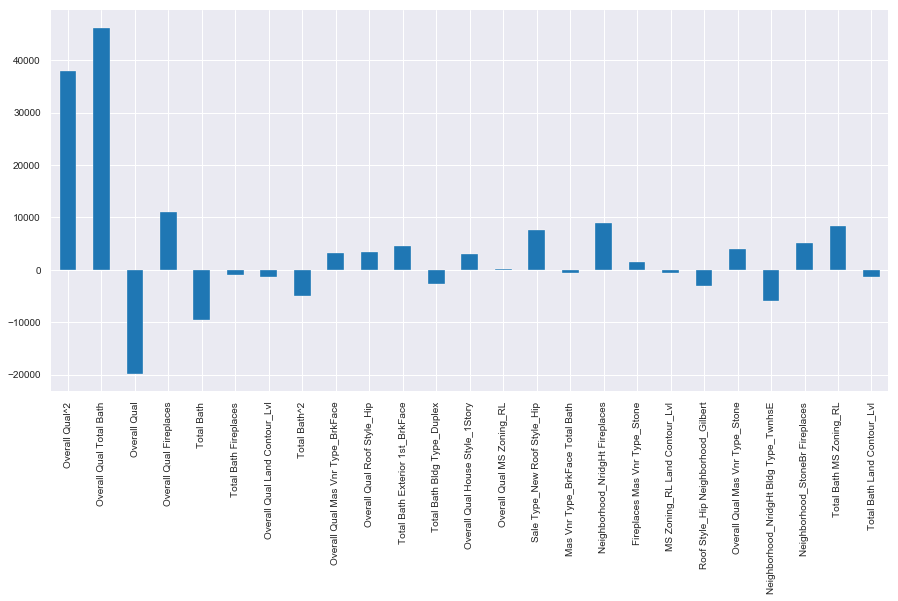

In [40]:
X = df_train_poly[features_model_3]
y = df_train['SalePrice']

coeff=[]
#Test run model with top 25 features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(df_test_poly[features_model_3])

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        
        pred = reg.predict(X_test_ss)
        print('{} score: {}'.format(str(reg).split('(')[0],score))
        print('{} mean score: {}'.format(str(reg).split('(')[0],score.mean()))
        print(' ')
        pd.Series(reg.coef_,index =features_model_3 ).plot.bar(figsize=(15,7))
        plt.show()
        print(' ')
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

In [41]:
submission_df(pred)

#### Kaggle Submission
Private Score 31534.80371 Public Score 32709.07920

# Modelling Visulation and results

### From Kaggle submission, best RMSE value model with close results were obtain from the model consisting of 134 predictors Without polynomial features. 
1. Public : 32709
2. Private: 31534

The Following inferential Visualization will look at the features and various metrics of the model.

In [42]:
ridge_coeff_df.sort_values(by='Coefficient', inplace = True, ascending = False)
ridge_coeff_df.drop(columns ='abs coeff',inplace = True)

In [43]:
ridge_coeff_df.head(2)

,Features,Coefficient
9,Overall Qual,11993.063816
109,Sale Type_New,9259.067492


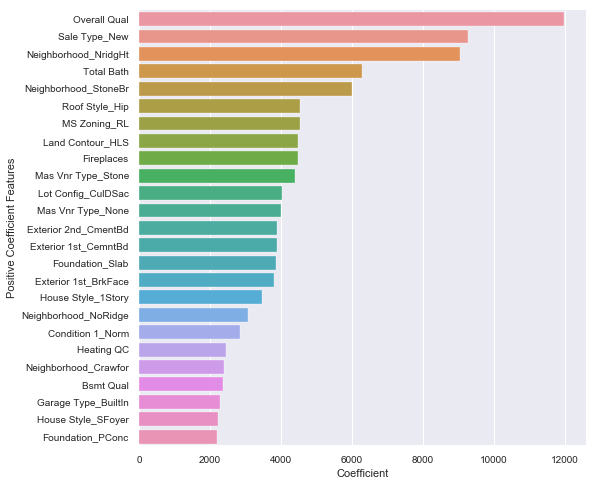

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(x='Coefficient', y = 'Features', data = ridge_coeff_df[:25],ci = 'sd');
plt.ylabel('Positive Coefficient Features')
plt.show()

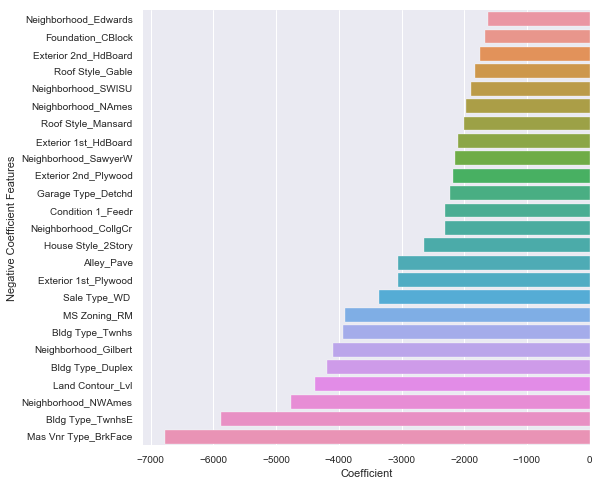

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x='Coefficient', y = 'Features', data = ridge_coeff_df[-25:],ci = 'sd');
plt.ylabel('Negative Coefficient Features')
plt.show()

In [46]:
# use ridge model to do initial kaggle submission
#obtaining the all features

X = df_train[features]
y = df_train['SalePrice']
coeff=[]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.fit_transform(X_test)

ridge_search = RidgeCV(alphas=np.logspace(0,5,200),store_cv_values=True)
ridge_search.fit(X_train_ss,y_train)
ridge = Ridge(alpha= ridge_search.alpha_)

reg_list =[ridge]
for reg in reg_list:

        score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
        reg.fit(X_train_ss,y_train)
        pred = reg.predict(X_test_ss)
        
        reg_coeff =dict(zip(features,abs(reg.coef_)))
        coeff.append(reg_coeff)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


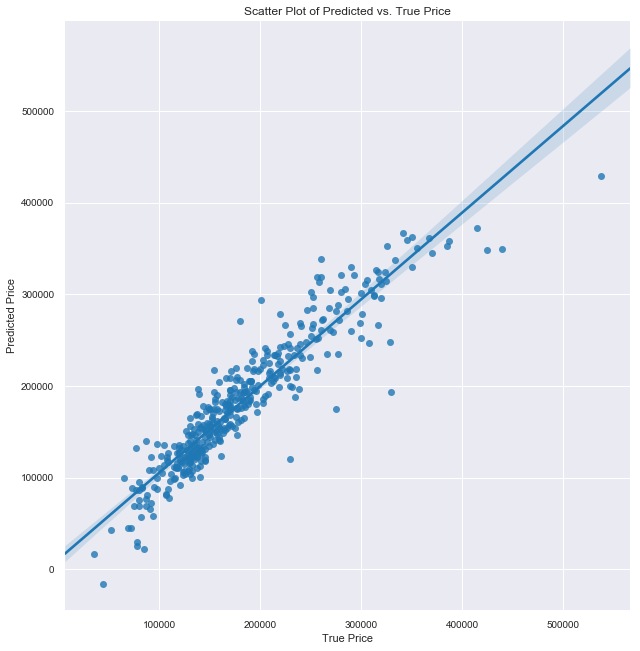

In [47]:
# Look at prediction accuracy
plot_df = pd.DataFrame()

plot_df['true'], plot_df['pred'] = y_train_final, pred
sns.lmplot(x='true', y='pred', data=plot_df, height=9)
plt.title('Scatter Plot of Predicted vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

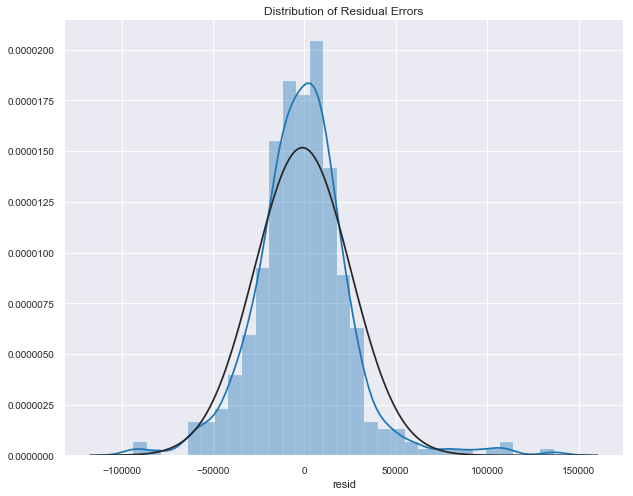

In [48]:
# Check whether the residual errors follow a normal distribution?
plot_df['resid'] = plot_df['true'] - plot_df['pred']
plt.figure(figsize=(10,8), facecolor='white')
sns.distplot(plot_df['resid'], fit=stats.norm)
plt.title('Distribution of Residual Errors')
plt.show()


> <font size = 3 color = "crimson"> So what if it's normal or not? What is the point you are trying to make?
</font>

##  Recommendations
---

In [49]:
ridge_coeff_df.sort_values(by='Coefficient', ascending=False).head(20)

,Features,Coefficient
9,Overall Qual,11993.063816
109,Sale Type_New,9259.067492
42,Neighborhood_NridgHt,9034.907395
4,Total Bath,6275.980407
36,Neighborhood_StoneBr,5993.889078
99,Roof Style_Hip,4531.170178
126,MS Zoning_RL,4525.870836
77,Land Contour_HLS,4483.087531
8,Fireplaces,4472.804223
25,Mas Vnr Type_Stone,4379.664379


In [50]:
ridge_coeff_df.sort_values(by='Coefficient', ascending=True).head(20)

,Features,Coefficient
80,Mas Vnr Type_BrkFace,-6780.496071
46,Bldg Type_TwnhsE,-5881.073591
14,Neighborhood_NWAmes,-4755.635035
52,Land Contour_Lvl,-4384.086891
98,Bldg Type_Duplex,-4190.717799
130,Neighborhood_Gilbert,-4089.741351
118,Bldg Type_Twnhs,-3931.396583
65,MS Zoning_RM,-3894.607260
48,Sale Type_WD,-3356.697528
129,Exterior 1st_Plywood,-3057.990762


#### Which features appear to add the most value to a home?
- The size of a home, such as above ground living area, first floor and basement area. For instance, a 1 square foot increase in above ground living area will on average increase \$11000 in value to a home. 
- Overall quality rating of the material and finish of a house - a 1 unit increase in the quality rating will increase the value to a home by around \$12000.


#### Which features hurt the value of a home the most?
- A townhouse building type will lower value by $5900
- Brick Face Masonary Veener type will lower building price by \$6780
- For a house located in North Ames, its value is expected to be lower by \$2300 in comparison to a house located in Bloomington Heights.

#### What are things that homeowners could improve in their homes to increase the value?
- Increasing the total number of bath
- Number of Fireplaces

#### What neighborhoods seem like they might be a good investment?
- Northridge Heights approx \$9000
- Stone Brook        approx \$6000
- Northridge         approx \$3000

#### Do you feel that this model will generalize to other cities?
- It depends on factors such as whether other cities have similar building types to Ames. I suspect the model will not work as well on cities with a high-density of high-rise apartments as many of the features in our current model are biased towards bungalows.
- Features related to Ames city, such as neighborhood, will also have to be removed.

#### How could you revise your model to make it more universal OR what factors would you need from another city to make a comparable model?
- Group related features to generalize the model even further, such as overall size of home, binary variables for facilities, or distance to points of interests such as schools, supermarkets, etc.